# Analyzing the Main Reasons of Divorce
## Based on Questions that has been Asked from Couples
### [To Access the Dataset click](https://www.kaggle.com/datasets/andrewmvd/divorce-prediction)

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import re

C:\Users\RaDmAn2222\AppData\Local\Temp\ipykernel_15852\673028719.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("divorce_data.csv")
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Q1       170 non-null    int64
 1   Q2       170 non-null    int64
 2   Q3       170 non-null    int64
 3   Q4       170 non-null    int64
 4   Q5       170 non-null    int64
 5   Q6       170 non-null    int64
 6   Q7       170 non-null    int64
 7   Q8       170 non-null    int64
 8   Q9       170 non-null    int64
 9   Q10      170 non-null    int64
 10  Q11      170 non-null    int64
 11  Q12      170 non-null    int64
 12  Q13      170 non-null    int64
 13  Q14      170 non-null    int64
 14  Q15      170 non-null    int64
 15  Q16      170 non-null    int64
 16  Q17      170 non-null    int64
 17  Q18      170 non-null    int64
 18  Q19      170 non-null    int64
 19  Q20      170 non-null    int64
 20  Q21      170 non-null    int64
 21  Q22      170 non-null    int64
 22  Q23      170 non-null    i

In [4]:
data.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [5]:
#scaling the values
scaler = StandardScaler()
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X = scaler.fit_transform(X)
X

array([[ 0.13777162,  0.23700896,  1.58388339, ...,  0.32764372,
        -0.16065589, -0.60850749],
       [ 1.37046505,  1.60282332,  1.58388339, ...,  1.00690508,
        -0.16065589, -0.00707567],
       [ 0.13777162,  0.23700896,  0.16672457, ..., -0.35161765,
        -0.16065589, -0.00707567],
       ...,
       [-0.4785751 , -0.44589822, -1.25043425, ...,  0.32764372,
        -1.49292424, -1.20993931],
       [-1.09492181, -1.12880539, -1.25043425, ...,  1.00690508,
         0.50547829, -0.60850749],
       [-1.09492181, -1.12880539, -1.25043425, ...,  0.32764372,
         0.50547829, -0.60850749]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

### Getting the most important features using Random Forest

In [7]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=4)
rfc.fit(X_train, y_train)
importances = rfc.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 39 (0.133532)
2. feature 10 (0.095920)
3. feature 18 (0.093510)
4. feature 17 (0.073960)
5. feature 8 (0.050513)
6. feature 25 (0.047708)
7. feature 16 (0.047583)
8. feature 15 (0.046215)
9. feature 14 (0.037593)
10. feature 4 (0.034621)
11. feature 3 (0.031806)
12. feature 26 (0.028285)
13. feature 11 (0.028221)
14. feature 19 (0.022099)
15. feature 28 (0.020955)
16. feature 38 (0.020636)
17. feature 7 (0.019215)
18. feature 0 (0.018195)
19. feature 37 (0.016646)
20. feature 27 (0.012415)
21. feature 35 (0.011303)
22. feature 23 (0.010961)
23. feature 43 (0.010489)
24. feature 13 (0.010040)
25. feature 29 (0.009853)
26. feature 1 (0.009707)
27. feature 24 (0.009520)
28. feature 40 (0.009241)
29. feature 20 (0.008671)
30. feature 22 (0.007815)
31. feature 2 (0.004215)
32. feature 31 (0.002123)
33. feature 32 (0.002107)
34. feature 47 (0.001644)
35. feature 53 (0.001468)
36. feature 52 (0.001465)
37. feature 36 (0.001436)
38. feature 48 (0.001420)
39. feature

### Making a ML model using Logistic Regression

In [8]:
# using Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [9]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[17  1]
 [ 0 16]]


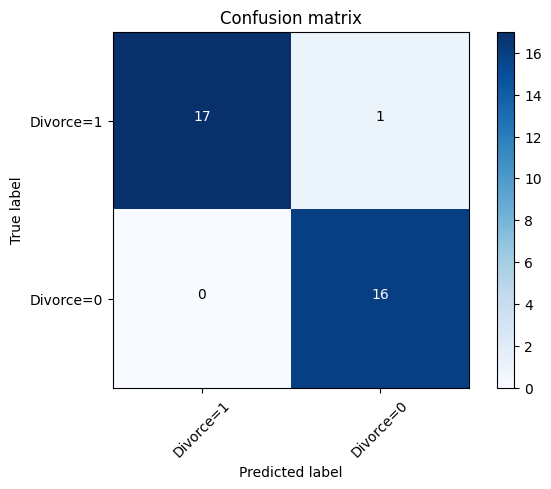

In [11]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Divorce=1','Divorce=0'],normalize= False,  title='Confusion matrix')

In [12]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.94      0.97        18

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



### Making a txt file and arranging the most effective qustions with their importance level and the most repeated answers

In [13]:
refrence_file = open("reference.tsv", "r")
lines = refrence_file.readlines()
txt = """This dataset contains data about 150 couples with their corresponding Divorce Predictors Scale variables (DPS) on the basis of Gottman couples therapy.
The couples are from various regions of Turkey wherein the records were acquired from face-to-face interviews from couples who were already divorced or happily married.
All responses were collected on a 5 point scale (0=Never, 1=Seldom, 2=Averagely, 3=Frequently, 4=Always). \n\n\n"""
refrence_file.close()

for f in range(X_train.shape[1]):
    index_str = str(indices[f] + 1)
    
    for line in lines:
        result = re.findall(r"^" + re.escape(index_str) + r"\|.+?\.", line)
        if result:
            txt += f"{f+1}. " + re.findall(r"\|(.+)",result[0])[0] +"\n"+ "------> importance:" + "{:.2f}".format(importances[indices[f]]) + \
                "         Most repeated answer: " + str(data[f"Q{indices[f]+1}"].value_counts().index.tolist()[0]) + " ----->" + " Counts: " + \
                    str(max(data[f"Q{indices[f]+1}"].value_counts())) + "\n\n"

result_file = open("result.txt", "w")
result_file.write(txt)
result_file.close()